# Пакет Pandas (Python Data Analysis Library)

Пакет для Python, реализующий быстрые, функциональные и выразительные структуры данных, разработанные для обеспечения удобной работы работы с данными, как с реляционными или именованными данными. Целью пакета является предоставление базовых "строительных" блоков для анализа данных на Python. В дополнение, пакет имеет широкую цель стать наиболее мощным и функциональным open source инструментом для анализа данных, доступным на любом языке.

Pandas подходит для следующих видов данных:
* Табличные данные со столбами разных типов (SQL или MS Excel)
* Упорядоченные или неупорядоченные временные серии
* Произвольные двухмерные данные (матрицы) с подписями строк и столбцов (pivot)
* Наблюдаемые или статистические данные

Лекция основана на официальной документации с сайта pandas.pydata.org:

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

# Эксель-таблица

* Бесконечная таблица
    * По вертикали столбцы с символьными именами
    * По горизонтали строки с номерами
* Доступ через операцию индексации A1:C20

Минусы:
* Сложность реализации вычислений с таблицей (надо тянуть мышкой контент в ячейках)
* Низкая производительность

# Реляционная модель

* Таблицы, столбцы, строки (кортежи)
* Реляционная алгебра
* SELECT ... FROM ... WHERE ... GROUP BY

Основными понятиями реляционных баз данных являются тип данных, домен, атрибут, кортеж, первичный ключ и отношение. Таблица хранит информацию о элементах отношения «кинофильмы». Каждая строка отвечает одной сущности «кинофильм», а каждый столбец одному из атрибутов множеству сущностей «кинофильмы». Отношения могут хранить не только множества сущностей, но и экземпляры связей.

# CRUD
* Create
* Read
* Update
* Delete

Акроним, обозначающий четыре базовые функции, используемые при работе с базами данных: создание (create), чтение (read), модификация (update), удаление (delete). Введён Джеймсом Мартином (англ. James Martin) в 1983 году как стандартная классификация функций по манипуляции данными.

В SQL этим функциям, операциям соответствуют операторы Insert (создание записей), Select (чтение записей), Update (редактирование записей), Delete (удаление записей). В некоторых CASE-средствах использовались специализированные CRUD-матрицы или CRUD-диаграммы, в которых для каждой сущности указывалось, какие базовые функции с этой сущностью выполняет тот или иной процесс или та или иная роль.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import tabulate
import datetime

# Тип Series

Тип __Series__
* Одномерный (упорядоченный) массив с индексацией
* Поддерживает следующие типы: integers, strings, floating point numbers, Python objects, etc.
* Индекс - список меток (имен, labels) строк

По-умолчанию, используются номера строк, начиная с 0, в качестве индекса.

Общий синтаксис:
```
s = pd.Series(data, index=index)
```

Источники данных:
* Скаляр
* Словарь
* Список
* numpy.ndarray

## Создание объекта (CREATE)

* __pd.Series([1.1, 1.2, 1.05])__ - индекс по-умолчанию
* __pd.Series([1.1, 2.2, 3.3], index = ["a", "b", "c"])__ - индекс в виде списка имен
* __pd.Series([1, 2, 3], index = list("abc"), dtype=np.int16)__ - задан тип
* __pd.Series(np.random.randn(5), index=["first", "second", "third", "fourth", "fifth"])__ - numpy.ndarray
* __pd.Series({ "a": 1, "b": 2, "c": 3 })__ - словарь
* __pd.Series({ "a": 1, "b": 2, "c": 3 }, index = ["b", "c", "d", "a", "e"])__
* __pd.Series(1.1, index = list("abcde"), name = "Серия 1")__ - задание имени

In [5]:
pd.Series(1.1, index = list("abcde"), name = "Серия 1") 

a    1.1
b    1.1
c    1.1
d    1.1
e    1.1
Name: Серия 1, dtype: float64

## Чтение (READ)

In [3]:
s = pd.Series(np.random.rand(26), index=list("abcdefghijklmnopqrstuvwxyz"))

### Метод []
* __s[2]__ - доступ к элементу по индексу (порядковому номеру)
* __s["a"]__ - доступ по строковой метке (строковый индекс)
* __s[1:4]__ - срез
* __s[[7, 4, 2]]__ - выборка по списку номеров
* __s[boolarray]__ - выборка по булевой маске
    * __s[[True, False, True, ...]]
    * __s[s > 0.5]__ - выборка по условию (результат отработки условия - булева маска)
* __s[callable]__ - выборка с использованием объекта-функции

### loc
* __s.loc["a"]__ - доступ по метке
* __s.loc[["a", "b", "h"]]__ - выборка элементов по списку меток
* __s.loc["a":"j"]__ - доступ по slice меток
* __s.loc[s > 0.8]__ - выборка по условию
* __s.loc[callable]__ - выборка с использованием объекта-функции
* __s.iloc[[x % 3 == 0 for x in range(26)]]__
* __s.loc[(x % 3 == 0 for x in range(26))]__

Callable examples:
* s.loc[lambda s : s > 0.5]


In [4]:
s.loc[(x % 3 == 0 for x in range(26))];

### iloc
* __s.iloc[10]__
* __s.iloc[[1, 4, 2, 2, 5]]__
* __s.iloc[[ (x * x) % 26 for x in range(26) ]]__
* __s.iloc[2:4]__
* __s.iloc[callable]__
    * __s.iloc[lambda s : s > 0]__
    * __s.iloc[(x % 3 == 0 for x in range(26))]__
* __s.iloc[list_of_bool]__
    * __s.iloc[[True, False, ...]]__
    * __s.iloc[[x % 2 == 0 for x in range(26)]]__

In [5]:
s.iloc[[ (x * x) % 26 for x in range(26) ]];

### at

Выбор одного элемента

In [6]:
s.at["a"]

0.03503849417175797

### head, tail

In [7]:
s.head(3)

a    0.035038
b    0.974106
c    0.447031
dtype: float64

In [8]:
s = pd.Series(np.random.rand(26), index=list(reversed("abcdefghijklmnopqrstuvwxyz")))
display(s.head())
display(s.index[0])
display(s[0])
display(s["a"])
print(s.loc(0))

z    0.086070
y    0.625357
x    0.663493
w    0.870881
v    0.654292
dtype: float64

'z'

0.08606974056410621

0.28489859274207274

# Тип DataFrame

Тип __DataFrame__
* Двумерный массив с индексацией
* Индекс

Можно рассматривать Series как контейнер для скаляров, а DataFrame как контейнер для Series.

## Создание объекта

* Словарь из 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* Series
* Другой DataFrame

Варианты:
* pd.DataFrame( [['11', '12'], ['21', '22'], ['31', '32']])
* pd.DataFrame([['11', '12'], ['21', '22'], ['31', '32']], index=["L1", "L2", "L3"], columns=["C1", "C2"])
* pd.DataFrame({"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]})
* pd.DataFrame([{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}, {"a": 3}])
* pd.DataFrame([{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}, {"a": 3}], columns=["b", "a"])
* pd.DataFrame(pd.DataFrame(d, columns=["b", "a"]), columns=["a", "b"], index=[0, 3])

In [8]:
# d = {
#     "COL1": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
#     "COL2": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
# }
# pd.DataFrame(d)

pd.DataFrame([['11', '12'], ['21', '22'], ['31', '32']], index=["L1", "L2", "L3"], columns=["C1", "C2"])

,C1,C2
L1,11,12
L2,21,22
L3,31,32


## Чтение (READ)

In [10]:
df = pd.DataFrame(np.random.rand(10, 5), index = list("abcdefghij"), columns=list("ABCDF"))

### Метод []

* df[1:3] - выборка строк по срезу
* df["c":"f"]
* df[boolarray] - выборка по списку bool
* df["A"] - доступ к столбцу по имени
* df[["A", "C"]] - выборка по списку столбцов

In [28]:
df[3:5]

,A,B,C,D,F
d,0.558544,0.647646,0.411030,0.225828,0.115639
e,0.137456,0.990498,0.756299,0.939600,0.989553


### loc

__df.loc[rowindexer, columnindexer]__

__rowindexer:__
* Список лейблов
* Срез лейблов
* Массив булевых значений

__Примеры:__
* df.loc[1, ["A", "B"]]
* df.loc[1:3, "A"]
* df.loc[[1, 4, 7], ["B", "A"]]
* df.loc[4, 1:2]
* df.loc[boolarray]
* df.loc[lambda x: x["A"] > 0, :]


In [35]:
#display(df)
df.loc[lambda x: x["A"] > 0.5, :]

,A,B,C,D,F
a,0.577663,0.501388,0.320682,0.538627,0.439830
d,0.558544,0.647646,0.411030,0.225828,0.115639
g,0.959753,0.445247,0.740367,0.228129,0.091683
h,0.846094,0.979272,0.324588,0.344975,0.300143


## iloc

Доступ к подмножеству по целочисленным номерам, а не по лейблам индекса.

__df.loc[rowindexer, columnindexer]__

__rowindexer:__
* Список номеров строк
* Срез номеров строк

__Примеры:__
* __df.iloc[1, 2]__
* __df.iloc[1:3, 2]__
* __df.iloc[[1, 4, 2, 2, 5], 0:1]__
* __df.iloc[[ (x * x) % 26 for x in range(26) ], "A"]__
* __df.iloc[2:4, "A"]__
* __df.iloc[callable]__
* __s.iloc[list_of_bool, columns]__

In [38]:
#df.iloc[[ (x * x) % 10 for x in range(10) ]]
df.iloc[1:3, "A"]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

### at

Доступ к элементу по лейблам индекса и именам столбца.

In [14]:
df.at["a", "A"];

# Изменение (UPDATE)

In [81]:
#df.iloc[0,0] = 5.0
#df.iloc[4:6, 1:3] = 123.0
#df.loc["a",:] = 10.0

## Создание нового столбца

In [54]:
df = pd.DataFrame(np.random.rand(10, 5), index = list("abcdefghij"), columns=list("ABCDF"))
df["X"] = np.nan
df

,A,B,C,D,F,X
a,0.983894,0.619833,0.072750,0.018243,0.222730,NaN
b,0.165232,0.504173,0.334171,0.777423,0.661240,NaN
c,0.321757,0.266426,0.421744,0.394489,0.188261,NaN
d,0.056706,0.572381,0.816545,0.844877,0.065603,NaN
e,0.204474,0.440813,0.876805,0.409702,0.808722,NaN
f,0.875044,0.810087,0.748646,0.884074,0.121421,NaN
g,0.016019,0.006127,0.688827,0.589131,0.041527,NaN
h,0.684444,0.351250,0.185445,0.543839,0.354958,NaN
i,0.054741,0.495991,0.877457,0.142868,0.538177,NaN
j,0.353119,0.676408,0.214131,0.782693,0.696459,NaN


## Использование выражений

In [41]:
df = pd.DataFrame(np.linspace(0, 2*np.pi, 100), columns=["X"])
display(df.head(3))
df["SIN"] = np.sin(df["X"])
df["COS"] = np.cos(df["X"])
df["SQ"]  = df["SIN"] ** 2 + df["COS"] ** 2
display(df)

,X
0,0.000000
1,0.063467
2,0.126933


,X,SIN,COS,SQ
0,0.000000,0.000000e+00,1.000000,1.0
1,0.063467,6.342392e-02,0.997987,1.0
2,0.126933,1.265925e-01,0.991955,1.0
3,0.190400,1.892512e-01,0.981929,1.0
4,0.253866,2.511480e-01,0.967949,1.0
...,...,...,...,...
95,6.029319,-2.511480e-01,0.967949,1.0
96,6.092786,-1.892512e-01,0.981929,1.0
97,6.156252,-1.265925e-01,0.991955,1.0
98,6.219719,-6.342392e-02,0.997987,1.0


# Преобразование типов

* pd.to_numeric
* df["C"].astype()

# Атрибуты объектов

In [16]:
print(s.shape)

(26,)


In [17]:
s.view

<bound method Series.view of z    0.086070
y    0.625357
x    0.663493
w    0.870881
v    0.654292
u    0.445574
t    0.954239
s    0.092715
r    0.056004
q    0.394741
p    0.852855
o    0.098733
n    0.728733
m    0.485050
l    0.227863
k    0.748874
j    0.561564
i    0.259611
h    0.501009
g    0.244893
f    0.253844
e    0.928718
d    0.086278
c    0.778453
b    0.494988
a    0.284899
dtype: float64>

In [18]:
s.array

<PandasArray>
[0.08606974056410621,  0.6253571530767826,  0.6634925367844793,
   0.870881349613118,  0.6542921801404629,  0.4455740987223904,
  0.9542385996723994, 0.09271484557669896,  0.0560036751033105,
 0.39474093008034794,  0.8528549769298448, 0.09873260853489985,
   0.728733444746727,  0.4850502225355273, 0.22786332697789824,
  0.7488735494582457,   0.561563902576994,  0.2596110874008768,
  0.5010088190456947, 0.24489251762473474, 0.25384398919347795,
  0.9287175162778534, 0.08627756440612977,  0.7784529559980182,
  0.4949884669105775, 0.28489859274207274]
Length: 26, dtype: float64

In [19]:
np.asarray(s)

array([0.08606974, 0.62535715, 0.66349254, 0.87088135, 0.65429218,
       0.4455741 , 0.9542386 , 0.09271485, 0.05600368, 0.39474093,
       0.85285498, 0.09873261, 0.72873344, 0.48505022, 0.22786333,
       0.74887355, 0.5615639 , 0.25961109, 0.50100882, 0.24489252,
       0.25384399, 0.92871752, 0.08627756, 0.77845296, 0.49498847,
       0.28489859])

In [20]:
x = s.to_numpy()

# Выборки (QUERIES)

In [44]:
df = pd.DataFrame(np.sin(np.linspace(0, 2*np.pi, 100)), columns=["SIN"])

## Метод where

Selecting values from a Series with a boolean vector generally returns a subset of the data. To guarantee that selection output has the same shape as the original data, you can use the where method in Series and DataFrame.

In [58]:
df.where(df["SIN"] > 0.1)

,SIN
0,NaN
1,NaN
2,0.126592
3,0.189251
4,0.251148
...,...
95,NaN
96,NaN
97,NaN
98,NaN


## Метод query

In [56]:
df = pd.DataFrame(np.sin(np.linspace(0, 2*np.pi, 100)), columns=["SIN"])
x = df.query("SIN > 0.5")

# Concantenate

The concat() function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Простой пример

In [21]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

pd.concat([df1, df2, df3], axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [22]:
## Конкантенация вдоль оси 1

In [23]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[0, 1, 2, 3],
)

df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[0, 1, 2, 3],
)

pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


## Иерархический индекс (аргумент keys)

In [24]:
pd.concat([df1, df2, df3], keys=["a", "b", "c"])

A    B    C    D
a 0   A0   B0   C0   D0
  1   A1   B1   C1   D1
  2   A2   B2   C2   D2
  3   A3   B3   C3   D3
b 0   A4   B4   C4   D4
  1   A5   B5   C5   D5
  2   A6   B6   C6   D6
  3   A7   B7   C7   D7
c 0   A8   B8   C8   D8
  1   A9   B9   C9   D9
  2  A10  B10  C10  D10
  3  A11  B11  C11  D11

## Способ сшивки по второй оси (аргумент join)

Устанавливает алгоритм, как сшивать по другой оси.

Значения: inner, outer (по-умолчанию).

In [25]:
df1 = pd.DataFrame({
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame({
        "A": ["A5", "A6", "A7", "A8"],
        "E": ["E0", "E1", "E2", "E3"]
    })

pd.concat([df1, df2], join = "inner")

,A
0,A0
1,A1
2,A2
3,A3
0,A5
1,A6
2,A7
3,A8


## Добавление новых строк

In [26]:
df1 = pd.DataFrame({
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3]
)
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"])
pd.concat([df1, s2.to_frame().T], ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


# Join

pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and the internal layout of the data in DataFrame.

pandas provides a single function, merge(), as the entry point for all standard database join operations between DataFrame or named Series objects.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging

```
pd.merge(
    left,
    right,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
```

## Простой пример

In [27]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    })

right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
    })

pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


## Outer Join (аргумент how)

In [28]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2"],
    "A":   ["A0", "A1", "A2"],
    "B":   ["B0", "B1", "B2"],
    })

right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "C":   ["C0", "C1", "C2", "C3"],
    "D":   ["D0", "D1", "D2", "D3"],
    })

pd.merge(left, right, on="key", how="right")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [29]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2"],
    "A":   ["A0", "A1", "A2"],
    "B":   ["B0", "B1", "B2"],
    })

right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A":   ["AA0", "AA1", "AA2", "AA3"],
    "C":   ["C0", "C1", "C2", "C3"],
    "D":   ["D0", "D1", "D2", "D3"],
    })

pd.merge(left, right, on="key", how="right", suffixes=[0, 1])

,key,A0,B,A1,C,D
0,K0,A0,B0,AA0,C0,D0
1,K1,A1,B1,AA1,C1,D1
2,K2,A2,B2,AA2,C2,D2
3,K3,NaN,NaN,AA3,C3,D3


## Join

In [30]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2"],
    "A":   ["A0", "A1", "A2"],
    "B":   ["B0", "B1", "B2"],
    })

right = pd.DataFrame({
    "C":   ["C0", "C1", "C2", "C3"],
    "D":   ["D0", "D1", "D2", "D3"],
    },
    index = ["K0", "K1", "K2", "K3"]
)

left.join(right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


# Группирование

Группирование (GROUP BY) можно представить как операцию, состоящую из 3 шагов:

* Разделение данных на группы по некоторому критерию
* Применение функции (агрегата) к каждой группе независимо
* Объединение результатов в конечное представление

Пример группирования в SQL:
```
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

In [68]:
d = pd.read_csv("data/titanic.csv")
display(d.head(3))
g = d.groupby(["Sex", "Survived"], dropna = False)
g.count()

#for k, v in g.groups: print(k, v)

#e = g["Age"]
#g.get_group(("female", 0))
#g.count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare   
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81  \
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [70]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
animals.groupby("kind").mean()

,height,weight
kind,,
cat,9.3,8.90
dog,20.0,102.75


### Встроенные методы агрегации

* __any()__ - Compute whether any of the values in the groups are truthy
* __all()__ - Compute whether all of the values in the groups are truthy
* __count()__ - Compute the number of non-NA values in the groups
* __cov()__ - Compute the covariance of the groups
* __first()__ - Compute the first occurring value in each group
* __idxmax()__ - Compute the index of the maximum value in each group
* __idxmin()__ - Compute the index of the minimum value in each group
* __last()__ - Compute the last occurring value in each group
* __max()__ - Compue the maximum value in each group
* __mean()__ - Compute the mean of each group
* __median()__ - Compute the median of each group
* __min()__ - Compute the minimum value in each group
* __nunique()__ - Compute the number of unique values in each group
* __prod()__ - Compute the product of the values in each group
* __quantile()__ - Compute a given quantile of the values in each group
* __sem()__ - Compute the standard error of the mean of the values in each group
* __size()__ - Compute the number of values in each group
* __skew()__ - Compute the skew of the values in each group
* __std()__ - Compute the standard deviation of the values in each group
* __sum()__ - Compute the sum of the values in each group
* __var()__ - Compute the variance of the values in each group

https://pandas.pydata.org/docs/user_guide/groupby.html#built-in-aggregation-methods

# Сравнение

In [33]:
df = pd.DataFrame({
        "C1": ["a", "a", "b", "b", "a"],
        "C2": [1.0, 2.0, 3.0, np.nan, 5.0],
        "C3": [1.0, 2.0, 3.0, 4.0, 5.0],
    },
    columns=["C1", "C2", "C3"],
)
df2 = df.copy()
df.loc[0, "C1"] = "H"
df2.loc[4, "C3"] = 100.0
display(df, df2)
r = df.compare(df2, keep_shape=True)
display(r)

,C1,C2,C3
0,H,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


,C1,C2,C3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,100.0


C1         C2         C3       
  self other self other self  other
0    H     a  NaN   NaN  NaN    NaN
1  NaN   NaN  NaN   NaN  NaN    NaN
2  NaN   NaN  NaN   NaN  NaN    NaN
3  NaN   NaN  NaN   NaN  NaN    NaN
4  NaN   NaN  NaN   NaN  5.0  100.0

# Описательная статистика

<class 'numpy.float64'>
min       -35.413139
max       -35.413139
sum       697.743091
mean        0.069774
q05       -16.557344
q50         0.064301
q95        16.535177
median      0.064301
std        10.051473
dtype: float64


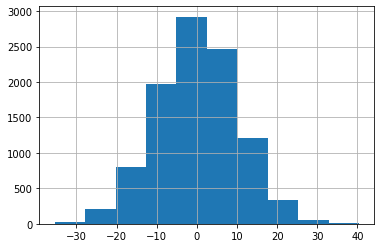

In [34]:
df = pd.Series(np.random.normal(0, 10.0, 10000))

print(type(df.min()))

stats = pd.Series()
stats["min"]    = df.min()
stats["max"]    = df.min()
stats["sum"]    = df.sum()
stats["mean"]   = df.mean()
stats["q05"]    = df.quantile(0.05)
stats["q50"]    = df.quantile(0.50)
stats["q95"]    = df.quantile(0.95)
stats["median"] = df.median()
stats["std"]    = df.std()

print(stats)
df.hist();

In [35]:
df = pd.DataFrame({
    "A": np.random.normal(0, 10.0, 10000),
    "B": np.random.normal(0, 10.0, 10000)
    })

stats = pd.DataFrame()
stats["min"]    = df.min()
stats["max"]    = df.max()
stats["sum"]    = df.sum()
stats["mean"]   = df.mean()
stats["q05"]    = df.quantile(0.05)
stats["q50"]    = df.quantile(0.50)
stats["q95"]    = df.quantile(0.95)
stats["median"] = df.median()
stats["std"]    = df.std()
stats = stats.T

print(stats)
# df.hist();

                  A           B
min      -37.331896  -37.647576
max       34.943804   37.229228
sum     1015.960317 -545.627173
mean       0.101596   -0.054563
q05      -16.326935  -16.851148
q50        0.120135    0.035678
q95       16.714052   16.328000
median     0.120135    0.035678
std       10.012871   10.101986


In [36]:
df.describe()

,A,B
count,10000.000000,10000.000000
mean,0.101596,-0.054563
std,10.012871,10.101986
min,-37.331896,-37.647576
25%,-6.640964,-6.839784
50%,0.120135,0.035678
75%,6.603700,6.805573
max,34.943804,37.229228


# Сводные таблицы

## Простой пример

In [37]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}

df = pd.DataFrame(data)
df

,value,variable,date
0,0,A,2020-01-03
1,1,A,2020-01-04
2,2,A,2020-01-05
3,3,B,2020-01-03
4,4,B,2020-01-04
5,5,B,2020-01-05
6,6,C,2020-01-03
7,7,C,2020-01-04
8,8,C,2020-01-05
9,9,D,2020-01-03


In [38]:
df.pivot(index="date", columns="variable", values="value")

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


# Временные Ряды

Тип для работы с временем:
* pd.Timestamp

Формат ISO-8601:
* 2023-11-13
* 2023-11-13T06:27:57+00:00
* 2023-11-13T06:27:57.123456

Способы задания:
* pd.Timestamp(year = 2023, month = 10, day = 8, hour = 23, minute = 20, second = 1, microsecond = 123456, tz = 3)
* pd.to_datetime("2023-10-10")
* pd.to_datetime(datetime.datetime(2023, 10, 13))
* pd_to_datetime(np.datetime64)

Задания диапазона:
* pd.date_range("2018-01-01", periods=10, freq="D")

In [39]:
pd.date_range("2018-01-01", periods=3, freq="H")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

# Векторизация

Вид распараллеливания программы, при котором однопоточные приложения, выполняющие одну операцию в каждый момент времени, модифицируются для выполнения нескольких однотипных операций одновременно.

Типы:
* SISD (single instruction, single data)
* SIMD (single instruction, multiple data)
* MISD
* MIMD

https://ru.wikipedia.org/wiki/SIMD

# Ускорение расчетов

* Использование Cython
* 

## Использование Cython

In [40]:
%load_ext Cython

In [41]:
df = pd.DataFrame({
        "a": np.random.randn(1000),
        "b": np.random.randn(1000),
        "N": np.random.randint(100, 1000, (1000)),
        "x": "x",
    })
df

,a,b,N,x
0,-0.202817,1.356783,734,x
1,-1.310161,-2.733540,603,x
2,-0.517037,-0.674483,810,x
3,-1.037555,1.289645,217,x
4,-1.326197,-0.377445,796,x
...,...,...,...,...
995,0.061554,0.294387,590,x
996,-0.686865,1.605193,545,x
997,-0.718194,1.751184,353,x
998,1.272736,-0.631775,295,x


# Особенности Pandas

* Все операции происходят в памяти, в отличие от баз данных, но есть способы работы с большими данными
* Фичи для работы с разряженными массивами
* Использование cython или numpy ускоряет расчеты